In [ ]:
library('ggplot2')
library('plyr')
library('tidyr')
library('parallel')
library('lme4')
source('ss_analysis.R')
library("scales")
reverselog_trans <- function(base = exp(1)) {
    trans <- function(x) -log(x, base)
    inv <- function(x) base^(-x)
    trans_new(paste0("reverselog-", format(base)), trans, inv, 
              log_breaks(base = base), 
              domain = c(1e-100, Inf))
}

In [ ]:
# if exists, load data, skip Cross-Linguistic correlations section
load('crosslinguistic_pic2.RData')

# Cross-Linguistic Correlations

### Google 1T

In [2]:
source('ss_analysis.R')
languages = c('ENGLISH',"SPANISH",'FRENCH', 'DUTCH', 'GERMAN','SWEDISH','CZECH','POLISH','ROMANIAN','ITALIAN','PORTUGUESE')
withoutEndMarker = lapply(languages, function(language){getScoresForLanguage(
    '/shared_hd2/models/ss/10-17-17_GoogleUnigram', 'Google1T','25000',language, endMarker=T,  corMethod='spearman', opusFilter=T)})

[1] "original number in ENGLISH: 49905"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ENGLISH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in SPANISH: 49916"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in SPANISH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in FRENCH: 49826"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in FRENCH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in DUTCH: 49910"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in DUTCH: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in GERMAN: 49705"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in GERMAN: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCod

In [3]:
subset(withoutEndMarker[[1]]$score, xv == 'frequency' & yv %in% c('character_ss', 'ortho_n')) 

,yv,xv,resid_var,meanBootstrap,singleCor,lower,upper,pvalue,direction,corMethod,residualize,endMarker,language
32,character_ss,frequency,NA,-0.223087853,-0.222910535,-0.23846991,-0.20671386,NA,NA,spearman,FALSE,TRUE,English
33,ortho_n,frequency,NA,-0.181874435,-0.181764517,-0.19709290,-0.16536064,NA,NA,spearman,FALSE,TRUE,English
35,character_ss,frequency,ortho_n,-0.121492639,-0.121568098,-0.13645640,-0.10569688,NA,NA,spearman,TRUE,TRUE,English
36,ortho_n,frequency,character_ss,-0.008851466,-0.008778512,-0.02502575,0.00651044,NA,NA,spearman,TRUE,TRUE,English


In [4]:
subset(withoutEndMarker[[1]]$score, xv == 'ortho_n' & yv %in% c('unigramSurprisal','trigramSurprisal')) 

,yv,xv,resid_var,meanBootstrap,singleCor,lower,upper,pvalue,direction,corMethod,residualize,endMarker,language
56,unigramSurprisal,ortho_n,NA,0.18188683,0.18176452,0.16613406,0.19775778,NA,NA,spearman,FALSE,TRUE,English
57,trigramSurprisal,ortho_n,NA,0.32634149,0.32639171,0.31167224,0.34133427,NA,NA,spearman,FALSE,TRUE,English
59,unigramSurprisal,ortho_n,trigramSurprisal,0.04624788,0.04631042,0.03009971,0.06184564,NA,NA,spearman,TRUE,TRUE,English
60,trigramSurprisal,ortho_n,unigramSurprisal,0.26962204,0.26947889,0.25480670,0.28447665,NA,NA,spearman,TRUE,TRUE,English


In [5]:
# (character_ss, ortho_n) ~ frequency should be in the same direction (negative)
# [X]  make sure it isn't data problems
withoutEndMarker[[1]]$df[1:10,'character_ss']

[1] 4.229826 3.872805 3.610308 3.752620 3.910316 3.002372 3.120520 4.155493
 [9] 3.398807 6.233328

### Corpus Sizes

In [6]:
g1t_corpusCounts = do.call('rbind',lapply(withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
g1t_corpusCounts

language,numTokens,numTokens_pretty,analysisCount
English,266164702912,"266,164,702,912",25000
Spanish,30898286985,"30,898,286,985",25000
French,27912351558,"27,912,351,558",25000
Dutch,24127675184,"24,127,675,184",25000
German,18753615866,"18,753,615,866",25000
Swedish,20544242586,"20,544,242,586",25000
Czech,16238032967,"16,238,032,967",25000
Polish,17915063215,"17,915,063,215",25000
Romanian,19659866198,"19,659,866,198",25000
Italian,26020955264,"26,020,955,264",25000


In [8]:
source('ss_analysis.R')
nem = do.call('rbind', lapply(withoutEndMarker, function(x){x$score}))
nem$xv = expandColNames(nem$xv)
nem$yv = expandColNames(nem$yv)
#Better word-level metric names


nem = merge(nem,g1t_corpusCounts, by='language')
nem$language = as.factor(sapply(nem$language, simpleCap))
nem$languageCount = sapply(1:length(nem$language), function(x){paste0(nem$language[x], ' (', round(nem$numTokens[x] / 1000000000,0),'b)' )})
nem$yv_xv = paste(nem$yv, nem$xv, sep='-')

In [12]:
subset(nem, language == 'English' & yv == 'Difference: Unigram Surprisal - Trigram Surprisal')
#sort this before Hebrew

,language,yv,xv,resid_var,meanBootstrap,singleCor,lower,upper,pvalue,direction,corMethod,residualize,endMarker,numTokens,numTokens_pretty,analysisCount,languageCount,yv_xv
157,English,Difference: Unigram Surprisal - Trigram Surprisal,PIC - Phonemes,NA,-0.01510335,NA,-0.03240777,0.001998346,0.0176,lower,spearman,FALSE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-PIC - Phonemes
160,English,Difference: Unigram Surprisal - Trigram Surprisal,PIC - Phonemes,unigramSurprisal - trigramSurprisal,-0.01897180,NA,-0.04667588,0.008580274,0.0848,lower,spearman,TRUE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-PIC - Phonemes
163,English,Difference: Unigram Surprisal - Trigram Surprisal,Number of Phonemes,NA,-0.13461791,NA,-0.15044809,-0.118127894,0.0000,lower,spearman,FALSE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Phonemes
166,English,Difference: Unigram Surprisal - Trigram Surprisal,Number of Phonemes,unigramSurprisal - trigramSurprisal,-0.20494825,NA,-0.23273203,-0.177260542,0.0000,lower,spearman,TRUE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Phonemes
169,English,Difference: Unigram Surprisal - Trigram Surprisal,PIC - Characters,NA,-0.02747270,NA,-0.04451739,-0.010048526,0.0000,lower,spearman,FALSE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-PIC - Characters
172,English,Difference: Unigram Surprisal - Trigram Surprisal,PIC - Characters,unigramSurprisal - trigramSurprisal,-0.03489913,NA,-0.06275357,-0.006719794,0.0016,lower,spearman,TRUE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-PIC - Characters
175,English,Difference: Unigram Surprisal - Trigram Surprisal,Number of Characters,NA,-0.14445466,NA,-0.16166094,-0.127708276,0.0000,lower,spearman,FALSE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Characters
178,English,Difference: Unigram Surprisal - Trigram Surprisal,Number of Characters,unigramSurprisal - trigramSurprisal,-0.22337416,NA,-0.24977399,-0.197744041,0.0000,lower,spearman,TRUE,TRUE,266164702912,"266,164,702,912",25000,English (266b),Difference: Unigram Surprisal - Trigram Surprisal-Number of Characters


### Google Books 2012

In [13]:
source('ss_analysis.R')
books2012_languages = c('eng-all',"spa-all",'fre-all','ger-all','rus-all','heb-all', 'ita-all')
books2012_withoutEndMarker = lapply(books2012_languages, function(language){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram','GoogleBooks2012','25000', language, endMarker=T,  corMethod='spearman', contextLimit=0, opusFilter=T)})
names(books2012_withoutEndMarker) = books2012_languages

[1] "original number in eng-all: 49942"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in eng-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in spa-all: 49975"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in spa-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in fre-all: 49975"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in fre-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in ger-all: 49989"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ger-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in rus-all: 49990"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in rus-all: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "lan

### Corpus Sizes

In [18]:
gb12_corpusCounts = do.call('rbind',lapply(books2012_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language = language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
gb12_corpusCounts$language = sapply(gb12_corpusCounts$language, function(x){
    gb12_langRemapper[[x]]
})
gb12_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
eng-all,English,219341628008,"219,341,628,008",25000
spa-all,Spanish,35702125629,"35,702,125,629",25000
fre-all,French,41935191569,"41,935,191,569",25000
ger-all,German,16156137843,"16,156,137,843",25000
rus-all,Russian,11969108346,"11,969,108,346",25000
heb-all,Hebrew,2732185984,"2,732,185,984",25000
ita-all,Italian,12856363174,"12,856,363,174",25000


In [75]:
books2012.nem = do.call('rbind', lapply(books2012_withoutEndMarker, function(x){x$score}))
books2012.nem$xv = expandColNames(books2012.nem$xv)
books2012.nem$yv = expandColNames(books2012.nem$yv)
#Better word-level metric names

books2012.nem$language = sapply(books2012.nem$language, function(x){
    gb12_langRemapper[[x]]
})

books2012.nem = merge(books2012.nem,gb12_corpusCounts, by='language')
books2012.nem$language = factor(books2012.nem$language)
books2012.nem$languageCount = sapply(1:length(books2012.nem$language), function(x){paste0(books2012.nem$language[x], ' (', round(books2012.nem$numTokens[x] / 1000000000,0),'b)' )})
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')

In [ ]:
# hack to restore Hebrew entries rather than regenerate all the data
# lv = c('Unigram Surprisal','Trigram Surprisal','Frequency')
# sv = c('PIC - Phonemes', 'Number of Phonemes','Difference: PIC vs. No. Phonemes')
# residualize =c(TRUE,FALSE)
# eg_hebrew = expand.grid(lv, sv, residualize)

# hebrew =  do.call('rbind', lapply(1:nrow(eg_hebrew), function(x){subset(books2012.nem, language == 'Hebrew')[1,]}))
# hebrew$lv = eg_hebrew$Var1
# hebrew$sv = eg_hebrew$Var2
# hebrew$residualize = eg_hebrew$Var3
# hebrew$direction = 'lower'
# hebrew$pvalue = 0

# books2012.nem = rbind(books2012.nem, hebrew)

In [76]:
subset(books2012.nem, language == 'Hebrew' )$languageCount

[1] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"
 [6] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"
[11] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"
[16] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"
[21] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"
[26] "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)" "Hebrew (3b)"

### OPUS

In [22]:
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram','OPUS','25000',opus_languages[i], endMarker=T,  corMethod='spearman', opusFilter=T)})
names(opus_withoutEndMarker) = opus_languages

[1] "original number in en: 49888"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in en: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in ru: 49952"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in ru: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in he: 50000"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in he: 25000"
[1] "Getting correlations"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "Missing something!"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in de: 49956"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in de: 25000"
[1] "Getting correlations"
[1] "At the dictionary check"
[1] "languageCode: NA"
[1] "original number in fr: 49937"
[1] "Limiting analysis"
[1] "Filtering..."
[1] "filtered number in f

### Corpus Sizes

In [23]:
opus_corpusCounts = do.call('rbind',lapply(opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
opus_corpusCounts

,language,numTokens,numTokens_pretty,analysisCount
en,English,329906086,"329,906,086",25000
ru,Russian,42950666,"42,950,666",25000
he,Hebrew,65088282,"65,088,282",25000
de,German,39409031,"39,409,031",25000
fr,French,169303943,"169,303,943",25000
es,Spanish,197811726,"197,811,726",25000
cs,Czech,94730204,"94,730,204",25000
pt,Portuguese,105486083,"105,486,083",25000
pl,Polish,66770062,"66,770,062",25000
ro,Romanian,133902571,"133,902,571",25000


In [24]:
opus.nem = do.call('rbind', lapply(opus_withoutEndMarker, function(x){x$score}))
opus.nem$xv = expandColNames(opus.nem$xv)
opus.nem$yv = expandColNames(opus.nem$yv)
#Better word-level metric names
opus.nem = merge(opus.nem,opus_corpusCounts, by='language')
opus.nem$language = as.factor(sapply(opus.nem$language, simpleCap))
books2012.nem$yv_xv = paste(books2012.nem$yv, books2012.nem$xv, sep='-')
opus.nem$languageCount = sapply(1:length(opus.nem$language), function(x){paste0(opus.nem$language[x], ' (', round(opus.nem$numTokens[x] / 1000000,0),'m)' )})

In [25]:
opus_datasets = do.call('rbind',lapply(opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
opus_datasets$dataset = 'OPUS'                      
                        
gb12_datasets = do.call('rbind',lapply(books2012_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
gb12_datasets$dataset = 'GB12'

g1t_datasets = do.call('rbind',lapply(withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
g1t_datasets$dataset = 'G1T'

In [77]:
combined_datasets = rbind.fill(opus_datasets, gb12_datasets, g1t_datasets)
combined_datasets$dataset_language = paste0(combined_datasets$dataset, ': ', combined_datasets$language)

nem$languageLabel = paste('1T:', nem$languageCount)
books2012.nem$languageLabel = paste('GB12:', books2012.nem$languageCount)
opus.nem$languageLabel = paste('OPUS:', opus.nem$languageCount)
nem$dataset = '1T'
books2012.nem$dataset = 'GB12'
opus.nem$dataset = 'OPUS'
nem_combined = rbind.fill(nem, books2012.nem, opus.nem)

#partialsDF$languageLabel = paste('1T:', partialsDF$languageCount)
#gb12_partialsDF$languageLabel = paste('GB12:', gb12_partialsDF$languageCount)
#opus_partialsDF$languageLabel = paste('OPUS:', opus_partialsDF$languageCount)
#partialsDF$dataset = '1T'
#gb12_partialsDF$dataset = 'GB12'
#opus_partialsDF$dataset = 'OPUS'


#partialsDF_combined  = rbind.fill(partialsDF,gb12_partialsDF, opus_partialsDF)

In [78]:
subset(nem_combined, language == 'Hebrew')

,language,yv,xv,resid_var,meanBootstrap,singleCor,lower,upper,pvalue,direction,corMethod,residualize,endMarker,numTokens,numTokens_pretty,analysisCount,languageCount,yv_xv,languageLabel,dataset
841,Hebrew,Difference: PIC vs. No. Characters,Unigram Surprisal,NA,0.108430295,NA,0.096255672,0.120519657,0,higher,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Difference: PIC vs. No. Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
842,Hebrew,PIC - Characters,Unigram Surprisal,NA,0.302021131,0.302004943,0.286284263,0.318643726,NA,NA,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),PIC - Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
843,Hebrew,Number of Characters,Unigram Surprisal,NA,0.193590836,0.193503343,0.177417612,0.209670553,NA,NA,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Number of Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
844,Hebrew,Difference: PIC vs. No. Characters,Unigram Surprisal,character_ss - ortho_n,0.250237955,NA,0.219804084,0.278812003,0,higher,spearman,TRUE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Difference: PIC vs. No. Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
845,Hebrew,PIC - Characters,Unigram Surprisal,ortho_n,0.212984646,0.213079520,0.197494450,0.228374872,NA,NA,spearman,TRUE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),PIC - Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
846,Hebrew,Number of Characters,Unigram Surprisal,character_ss,-0.037253309,-0.037400621,-0.052815272,-0.019067959,NA,NA,spearman,TRUE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Number of Characters-Unigram Surprisal,GB12: Hebrew (3b),GB12
847,Hebrew,Difference: PIC vs. No. Characters,Trigram Surprisal,NA,0.017730851,NA,0.005117546,0.029077033,0,higher,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Difference: PIC vs. No. Characters-Trigram Surprisal,GB12: Hebrew (3b),GB12
848,Hebrew,PIC - Characters,Trigram Surprisal,NA,0.174733659,0.174638011,0.159668781,0.190399881,NA,NA,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),PIC - Characters-Trigram Surprisal,GB12: Hebrew (3b),GB12
849,Hebrew,Number of Characters,Trigram Surprisal,NA,0.157002808,0.156979692,0.141002383,0.173204057,NA,NA,spearman,FALSE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Number of Characters-Trigram Surprisal,GB12: Hebrew (3b),GB12
850,Hebrew,Difference: PIC vs. No. Characters,Trigram Surprisal,character_ss - ortho_n,0.045113114,NA,0.015407208,0.077143964,0,higher,spearman,TRUE,TRUE,2732185984,"2,732,185,984",25000,Hebrew (3b),Difference: PIC vs. No. Characters-Trigram Surprisal,GB12: Hebrew (3b),GB12


In [79]:
save.image('crosslinguistic_pic3.RData')

#load('crosslinguistic_pic.RData')

# Mixed Effects Model

In [ ]:
# first pull out all of the longform data
opus_df = do.call('rbind.fill', lapply(opus_withoutEndMarker, function(x){x[['df']]}))
opus_df$dataset = 'Opus'
g1t_df = do.call('rbind.fill', lapply(withoutEndMarker, function(x){x[['df']]}))
g1t_df$dataset = 'Google1T' 
gb12_df = do.call('rbind.fill', lapply(books2012_withoutEndMarker, function(x){x[['df']]}))
gb12_df$dataset = 'GoogleBooks' 
gb12_df$language = sapply(gb12_df$language, function(x){gb12_langRemapper[[x]]})

all_df = do.call('rbind.fill', list(opus_df, g1t_df, gb12_df))
all_df = all_df[!is.infinite(all_df$unigramSurprisal),]

In [ ]:
# split by language and dataset and scale ipa_ss and ipa_n within each
#sub_df = split(all_df,list(all_df$language,all_df$dataset))
# rescale_vars = function(df, varnames){    
#     if (nrow(df) > 0 ){
#         for (var in varnames){
#             print(var)
#              df[[paste0(var,'_rescaled')]] = scale(df[[var]],
#                 center = T, scale = sd(df[[var]], na.rm = TRUE))            
#         }
#         return(df)
#     }     
# }

# all_df = do.call('rbind', lapply(sub_df, function(df){
#     return(rescale_vars(df, c('unigramSurprisal',
#         'log_ipa_n',
#         'log_character_n',
#         'ipa_n',
#         'ipa_ss'                              
#     )))
# }))

In [ ]:
allWords = all_df
allWords$language_dataset = paste0(allWords$language,': \n',allWords$dataset)
excluding_opus = subset(allWords, dataset != 'Opus')

In [ ]:
#[ ] For presentation: find the best model by model comparison with AIC, then look at the predictors?
#[X] confirm that this is without the end marker
#[ ] do these refer to models of the appropriate order?
#   10-17-17_GoogleUnigram, confirme that this is trigram models 
#[ ] this assumes a linear realtionship. Probably not correct
#[X] +- log transformation for length? log frequency -> (duration / log duration)
# very small overall reduction in AIC

#[X] is there an improvement if we scale the predictors?
#    [X] Nope, degenerate Hessians

# Unigram Surprisal ~ Phoneme Length

In [ ]:
lm0 = lmer(unigramSurprisal ~ dataset*ipa_n + (1+ipa_n|language), 
    data=subset(allWords, index <= 25000), REML=F)
summary(lm0)

In [ ]:
r.squaredGLMM(lm0)

# Trigram Surprisal ~ Phoneme Length

In [ ]:
lm0_s = lmer(mean_surprisal_weighted ~ dataset*ipa_n + (1+ipa_n|language), 
    data=subset(allWords, index <= 25000), REML=F)
summary(lm0_s)

# Unigram Surprisal ~ Log Phoneme Length

In [ ]:
lm1 = lmer(unigramSurprisal ~ dataset*log_ipa_n + (1+ log_ipa_n|language), 
    data=subset(allWords, index <= 25000), REML=F)
summary(lm1)

In [ ]:
r.squaredGLMM(lm1)

Taking the log length in phonemes is a stronger correlate of unigram probability, consistent with the treatement of log duration in Yao, Gahl and Johnson (2012)

In [ ]:
mod_data = expand.grid(
    log_ipa_n = log(seq(1,20,1)),
    language = unique(excluding_opus$language),
    dataset = unique(excluding_opus$dataset))

mod_data$language_dataset= paste0(mod_data$language, ': \n', mod_data$dataset)
mod_data = subset(mod_data, language_dataset %in% excluding_opus$language_dataset & language != "Hebrew")

mod_data$predicted = predict(lm1, newdata=mod_data,
    allow.new.levels=TRUE,
    re.form = ~(1 + log_ipa_n | language))

# sanity check the variance accounted for by the model
options(repr.plot.width=8, repr.plot.height=8)
ggplot(excluding_opus) + geom_bin2d(aes(x=log_ipa_n, 
y=unigramSurprisal))+ facet_wrap(language~dataset
) + geom_line(data=mod_data,aes(x=log_ipa_n, y=predicted), colour='red'
) + geom_smooth(aes(x=log_ipa_n, y=unigramSurprisal), se = F, 
colour='cyan') + theme_bw() + xlab ('Log Length in Phonemes'
) + ylab('Negative Log Unigram Probability') + theme(legend.position="none")

print(r.squaredGLMM(lm1))

In [ ]:
#rotated version of the above (Log display)
options(repr.plot.width=8, repr.plot.height=8)
ggplot(excluding_opus) + geom_bin2d(aes(y=log_ipa_n, 
x=unigramSurprisal))+ facet_wrap(language~dataset
) + geom_smooth(aes(y=log_ipa_n, x=unigramSurprisal), se = F, 
colour='cyan') + theme_bw() + ylab ('Log Length in Phonemes'
) + xlab('Negative Log Unigram Probability') + theme(legend.position="none")

In [ ]:
#rotated version of the above; log transform unigram surprisal

options(repr.plot.width=8, repr.plot.height=8)
p1 = ggplot(excluding_opus) + geom_bin2d(aes(y=ipa_n, 
x=prob))+ facet_wrap(language~dataset
) + theme_bw() + ylab ('Word Length in Phonemes'
) + xlab('Word Probability') + theme(legend.position="none") + scale_x_continuous(trans=reverselog_trans(10)) 


pdf('figures/length_by_prob.pdf', width=6, height=6)
print(p1)
dev.off()

In [ ]:
#rotated version of the above; log transform unigram surprisal
options(repr.plot.width=8, repr.plot.height=8)
ggplot(excluding_opus) + geom_bin2d(aes(y=ipa_n, 
x=exp(-1 * mean_surprisal_weighted)))+ facet_wrap(language~dataset
) + theme_bw() + ylab ('Length in Phonemes'
) + xlab('Average in-context Probability') + theme(legend.position="none") + scale_x_reverse() 

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
p1 = ggplot(excluding_opus) + geom_bin2d(aes(y=-1*log(exp(-1*ipa_ss), base=2), 
x=prob))+ facet_wrap(language~dataset
) + theme_bw() + ylab ('Phonological Information Content (bits)'
) + xlab('Word Probability') + theme(legend.position="none") + scale_x_continuous(trans=reverselog_trans(10)) 
print(p1)

pdf('figures/pic_by_prob.pdf', width=6, height=6)
print(p1)
dev.off()

In [ ]:
#rotated version of the above; log transform unigram surprisal
options(repr.plot.width=8, repr.plot.height=8)
ggplot(excluding_opus) + geom_bin2d(aes(y=log_ipa_n, 
x=prob))+ facet_wrap(language~dataset
) + geom_smooth(aes(y=log_ipa_n, x=prob), se = F, 
colour='cyan') + theme_bw() + ylab ('Log Length in Phonemes'
) + xlab('Probability') + theme(legend.position="none") + scale_x_continuous(trans = 'log10') 

In [ ]:
excluding_opus$logUnigramSurprisal  = log(excluding_opus$unigramSurprisal)

lm_len_log = lmer(log_ipa_n ~  dataset * logUnigramSurprisal  + (1+logUnigramSurprisal|language), 
    data=excluding_opus, REML=F)
summary(lm_len_log)
print(r.squaredGLMM(lm_len_log))

In [ ]:
mod_data = expand.grid(
    logUnigramSurprisal = seq(from=1,to=4,by=.01),
    language = unique(excluding_opus$language),
    dataset = unique(excluding_opus$dataset))

mod_data$language_dataset= paste0(mod_data$language, ': \n', mod_data$dataset)
mod_data = subset(mod_data, language_dataset %in% excluding_opus$language_dataset & language != "Hebrew")

mod_data$predicted = predict(lm_len_log, newdata=mod_data,
    allow.new.levels=TRUE,
    re.form = ~(1 + logUnigramSurprisal | language))


options(repr.plot.width=8, repr.plot.height=6)
ggplot(excluding_opus) + geom_bin2d(aes(y=log_ipa_n, 
x=log(unigramSurprisal)))+ facet_wrap(language~dataset
) + geom_smooth(aes(y=log_ipa_n, x=log(unigramSurprisal)), se = F, 
colour='cyan') + theme_bw() + ylab ('Log Length in Phonemes'
) + xlab('Negative Log Unigram Probability') + geom_line(
data=mod_data,aes(x=logUnigramSurprisal, y=predicted), colour='red'
) + theme(legend.position="none")


# Trigram Surprisal ~ Log Phoneme Length

In [ ]:
excluding_opus = subset(allWords, index <= 25000 & dataset != 'Opus')
lm1_s = lmer(mean_surprisal_weighted ~ dataset*log_ipa_n + (1+log_ipa_n|language), 
    data=excluding_opus, REML=F)
summary(lm1_s)

In [ ]:
mod_data = expand.grid(
    log_ipa_n = log(seq(1,20,1)),
    language = unique(excluding_opus$language),
    dataset = unique(excluding_opus$dataset))

mod_data$language_dataset= paste0(mod_data$language, ': \n', mod_data$dataset)
mod_data = subset(mod_data, language_dataset %in% excluding_opus$language_dataset
& language != 'Hebrew')

mod_data$predicted = predict(lm1_s, newdata=mod_data,
    allow.new.levels=TRUE,
    re.form = ~(1+ log_ipa_n|language))

# sanity check the variance accounted for by the model
ggplot(excluding_opus) + geom_bin2d(aes(x=log_ipa_n, 
y=mean_surprisal_weighted))+ facet_wrap(language~dataset
) + geom_line(data=mod_data,aes(x=log_ipa_n, y=predicted), colour='red'
) + geom_smooth(aes(x=log_ipa_n, y=mean_surprisal_weighted), se = F, span=2/3,
colour='cyan'
) + theme_bw() + xlab ('Log Length in Phonemes') + ylab('Average Trigram Surprisal')

print(r.squaredGLMM(lm1_s))

# Unigram Surprisal ~ PIC

In [ ]:
allWords = na.exclude(allWords)
lm2 = lmer(unigramSurprisal ~ dataset*ipa_ss + (1+ ipa_ss|language), 
    data=subset(allWords, index <= 25000), REML=F)
summary(lm2)

In [ ]:
mod_data = expand.grid(
    ipa_ss = seq(from=1,to=20,by=.05),
    language = unique(excluding_opus$language),
    dataset = unique(excluding_opus$dataset))

mod_data$language_dataset = paste0(mod_data$language, ': \n', 
    mod_data$dataset)
mod_data = subset(mod_data, language_dataset %in% excluding_opus$language_dataset
& language != 'Hebrew')

mod_data$predicted = predict(lm2, newdata=mod_data,
    allow.new.levels=TRUE,
    re.form = ~(1 + ipa_ss| language))

p1 = ggplot(subset(excluding_opus, language != 'Hebrew')) + geom_bin2d(aes(x=ipa_ss, 
y=unigramSurprisal))+ facet_wrap(~language_dataset
)  + geom_smooth(aes(x=ipa_ss, y=unigramSurprisal), se = F, colour='cyan'
) + geom_line(data=mod_data,aes(x=ipa_ss, y=predicted), colour='red'
) +  theme_bw() + xlab("Word's Phonological Information Content"
) + ylab("Word's Negative Log Probability") + theme(legend.position="none")

pdf('figures/pic_by_unigram_prob.pdf', width=5, height=5)
print(p1)
dev.off()

options(repr.plot.width=6, repr.plot.height=6)
print(p1)
print(r.squaredGLMM(lm2))

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
p2= ggplot(subset(excluding_opus, language != 'Hebrew')) + geom_bin2d(aes(y=ipa_ss, 
x=unigramSurprisal))+ facet_wrap(~language_dataset
)  + geom_smooth(aes(y=ipa_ss, x=unigramSurprisal), se = F, colour='cyan'
) +  theme_bw() + ylab("Word's Phonological Information Content"
) + xlab("Word's Negative Log Probability") + theme(legend.position="none")
print(p2)

# Trigram Surprisal ~ PIC

In [ ]:
lm2_s = lmer(mean_surprisal_weighted ~ dataset*ipa_ss + (1+ ipa_ss|language), 
    data=subset(allWords, index <= 25000 & dataset != 'Opus'), REML=F)
summary(lm2_s)

In [ ]:
mod_data = expand.grid(
    ipa_ss = seq(from=1,to=20,by=.05),
    language = unique(excluding_opus$language),
    dataset = unique(excluding_opus$dataset))

mod_data$language_dataset = paste0(mod_data$language, ': \n', 
    mod_data$dataset)
mod_data = subset(mod_data, language_dataset 
%in% excluding_opus$language_dataset & language != 'Hebrew')

mod_data$predicted = predict(lm2_s, newdata=mod_data,
    allow.new.levels=TRUE,
    re.form = ~(1 + ipa_ss| language))

ggplot(subset(excluding_opus, language != 'Hebrew')) + geom_bin2d(aes(x=ipa_ss, 
y=mean_surprisal_weighted))+ facet_wrap(~language_dataset
)  + geom_smooth(aes(x=ipa_ss, y=mean_surprisal_weighted), se = F, colour='cyan'
) + geom_line(data=mod_data,aes(x=ipa_ss, y=predicted), colour='red'
) +  theme_bw() + xlab('Phonological Information Content'
) + ylab('Average Trigram Surprisal') + theme(legend.position="none")


print(r.squaredGLMM(lm2_s))

# Unigram Surprisal ~ PIC + Length

In [ ]:
#ipa_ss model
lm3 = lmer(unigramSurprisal ~ dataset*(ipa_ss + ipa_n) + (1+ ipa_n + ipa_ss|language), 
    data=subset(allWords, index <= 25000), REML=F)
summary(lm3)
print(r.squaredGLMM(lm3))

# Trigram Surprisal ~ PIC + Length

In [ ]:
lm3_s = lmer(mean_surprisal_weighted ~ dataset*(ipa_ss + ipa_n) + (1+ ipa_n + ipa_ss|language), 
    data=subset(allWords, index <= 25000 & dataset != 'Opus'), REML=F)
print(r.squaredGLMM(lm3_s))

# Unigram Surprisal ~ PIC + Length, Fixed Effects Only

In [ ]:
lm4 = lm(unigramSurprisal ~ ipa_ss * ipa_n , 
    data=subset(allWords, index <= 25000))
print(summary(lm4))
print(r.squaredGLMM(lm4))

In [ ]:
lm4_s = lm(mean_surprisal_weighted ~ ipa_ss * ipa_n , 
    data=subset(allWords, index <= 25000 & dataset != 'Opus'))
print(summary(lm4_s))
print(r.squaredGLMM(lm4))

AIC is significantly higher when we don't take the effects structures into account

# Compare All Models

In [ ]:
getScoresForModel = function(modelList){
    model_scores = data.frame(index = c(1:length(modelList)))
    model_scores$BIC = sapply(modelList, function(x){BIC(logLik(x))})
    model_scores$AIC = sapply(modelList, function(x){AIC(logLik(x))})
    model_scores$logLik = sapply(modelList, function(x){logLik(x)})
    model_scores$R2c = sapply(modelList, function(x){r.squaredGLMM(x)[['R2c']]})
    model_scores$R2m = sapply(modelList, function(x){r.squaredGLMM(x)[['R2m']]})
    return(model_scores)
}

In [ ]:
unigram_scores = getScoresForModel(list(lm0, lm1, lm2, lm3, lm4))
unigram_scores$lexvar = 'unigram'
trigram_scores = getScoresForModel(list(lm0_s, lm1_s, lm2_s, lm3_s, lm4_s))
trigram_scores$lexvar = 'trigram'
model_scores = rbind(unigram_scores, trigram_scores)

In [ ]:
ggplot(model_scores) + geom_line(aes(x=index, y=R2c, colour =lexvar)) +theme_bw()

In [ ]:
ggplot(model_scores) + geom_line(aes(x=index, y=R2m, colour =lexvar)) +theme_bw()

In [ ]:
What is the story here:

Uni. prob. ~ PIC + log length > Uni. prob. ~ PIC >> Uni. prob. ~ length
Tri. prob. ~ PIC + log length > Tri prob. ~ Log Length > Tri. prob. ~ PIC

1) This is for linear relationships -- there may be a better nonlinear relationship


Linear reationship with duration (UID, bitrate constancy)
Reciprocal relationship with phoneme distinctiveness





In [ ]:
allWords = na.exclude(allWords)
lm5 = lmer(unigramSurprisal ~ dataset*poly(ipa_ss,3) + (1+ poly(ipa_ss,3)|language), 
    data=subset(allWords, index <= 25000), REML=F)


In [ ]:
print(summary(lm5))
print(r.squaredGLMM(lm5))

In [ ]:
# how to get a fit similar to the spearman's rank correlation coefficient

# fit a higher-order polynomial? only a marginal improvement in AIC or R-squared
# NLMER mixed effects logistic growth curve? (very complex; unclear why a growth model is appropriate)




# Sanity Check: Spearman's Rho

In [ ]:
sub_df = split(all_df,list(all_df$language,all_df$dataset))

In [ ]:
names(sub_df[[1]])

In [ ]:
corMethod = 'spearman'
scores = do.call('rbind', lapply(sub_df, function(x){
    if (length(x$unigramSurprisal) > 0){
        x = subset(x, index <= 25000)
        return(            
            data.frame(
            uni_ipa = cor(x$ipa_ss, x$unigramSurprisal, method=corMethod, 
        use='pairwise.complete.obs'),
            uni_log_len = cor(x$log_ipa_n, x$unigramSurprisal, method=corMethod, 
        use='pairwise.complete.obs'),
            tri_ipa = cor(x$ipa_ss, x$mean_surprisal_weighted, method=corMethod, 
        use='pairwise.complete.obs'),                
            tri_log_len = cor(x$log_ipa_n, x$mean_surprisal_weighted, method=corMethod, 
        use='pairwise.complete.obs')    
            )
        
        )
    }     
}))

In [ ]:
scores$language = rownames(scores)
melted_scores = melt(scores, id='language')
names(melted_scores)
ggplot(melted_scores) + geom_histogram(aes(x=value, fill=variable))+ facet_grid(variable ~ .) + theme_bw()

In [ ]:
scores$ipa_improvement = scores$uni_ipa - scores$uni_log_len

In [ ]:
ggplot(scores) + geom_density(aes(x=ipa_improvement))

In [ ]:
# stronger Spearman's correlation of ipa with frequence than length with frequency
# complex relationship with trigram predictability

# Plot Correlations

In [ ]:
lv_list = c("Frequency")
sv_list = c("PIC - Characters","Number of Characters")
dodge <- position_dodge(width=0.9)

correlations = subset(nem_combined, lv %in% lv_list & sv %in% sv_list & !residualize)
partial_correlations = subset(nem_combined, lv %in% lv_list & sv %in% sv_list & residualize)
p_values = subset(nem_combined, lv %in% lv_list & sv == "Difference: PIC vs. No. Characters")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)



crosslinguistic_pic_characters = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(


) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=sv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), aes(x=languageLabel, y=-.21, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize), aes(x=languageLabel, y=.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize), aes(x=languageLabel, y=-.27, label=sig), colour='red'
) + geom_text(data=subset(p_values, direction == 'higher' & residualize), aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-characters.pdf', width=10, height=5)
print(crosslinguistic_pic_characters)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_characters)

[1] 58
[1] 58


Warning message:
“Ignoring unknown aesthetics: fill”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”

png 
  2

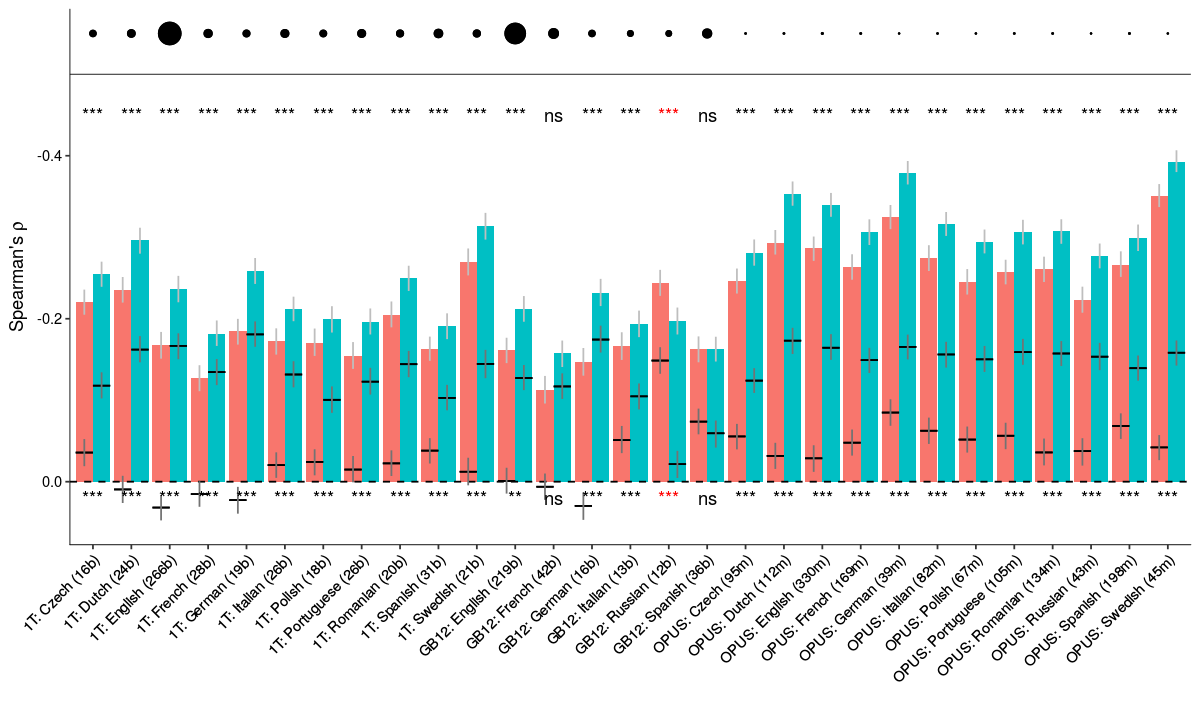

In [90]:
xv_list = c("Frequency")
yv_list = c("PIC - Phonemes","Number of Phonemes")
dodge <- position_dodge(width=0.9)

correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize)
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & residualize)
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: PIC vs. No. Characters"
                 & language != "Hebrew")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)

print(nrow(correlations))
print(nrow(partial_correlations))

crosslinguistic_pic_phonemes = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(


) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), 
    aes(x=languageLabel, y=-.45, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize),
    aes(x=languageLabel, y=.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize),
    aes(x=languageLabel, y=-.45, label=sig), colour='red'
) + geom_text(data=subset(p_values, direction == 'higher' & residualize),
    aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-phonemes', width=10, height=5)
print(crosslinguistic_pic_phonemes)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_phonemes)

[1] 62
[1] 62


Warning message:
“Ignoring unknown aesthetics: fill”Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”

png 
  2

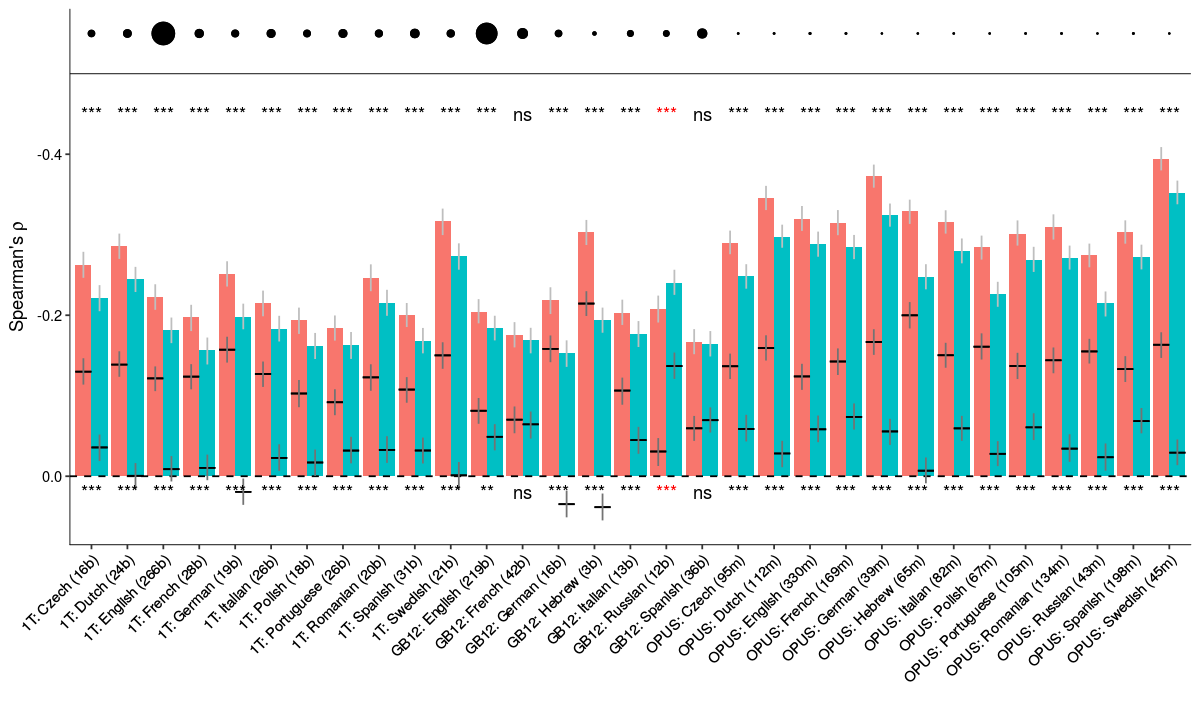

In [87]:
xv_list = c("Frequency")
yv_list = c("PIC - Characters","Number of Characters")
dodge <- position_dodge(width=0.9)

correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize)
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & residualize)
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: PIC vs. No. Characters")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)

print(nrow(correlations))
print(nrow(partial_correlations))

crosslinguistic_pic_characters = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.55, size=numTokens)) + scale_size_area(
) + geom_hline(aes(yintercept = -.5), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(


) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), 
    aes(x=languageLabel, y=-.45, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize),
    aes(x=languageLabel, y=.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize),
    aes(x=languageLabel, y=-.45, label=sig), colour='red'
) + geom_text(data=subset(p_values, direction == 'higher' & residualize),
    aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-characters.pdf', width=10, height=5)
print(crosslinguistic_pic_characters)
dev.off()

options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_characters)

# Comparison with Piantadosi et al. (2011), with bootstrapping

Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”

png 
  2

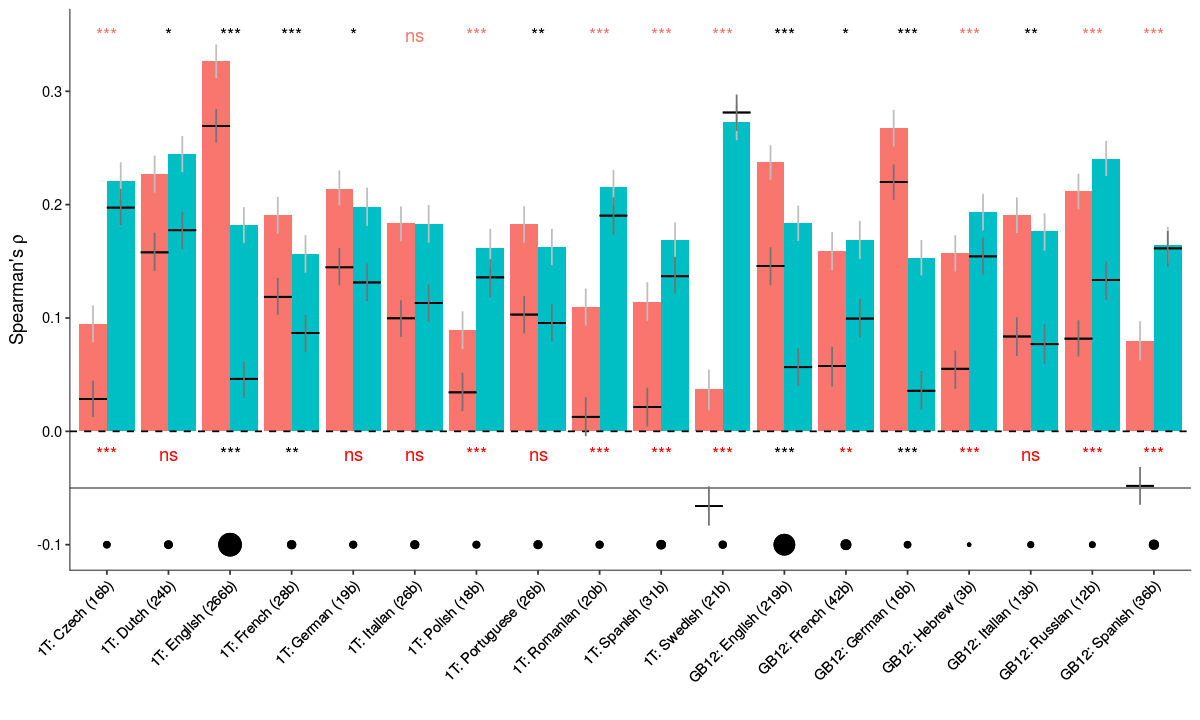

In [80]:
source('ss_analysis.R')
xv_list = c("Number of Characters")
yv_list = c("Unigram Surprisal",'Trigram Surprisal')

dodge <- position_dodge(width=0.9)
correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & !residualize & dataset
!= "OPUS")
partial_correlations = subset(nem_combined, xv %in% xv_list & yv %in% yv_list & 
residualize & dataset != "OPUS")
p_values = subset(nem_combined, xv %in% xv_list & yv == "Difference: Unigram Surprisal - Trigram Surprisal")
p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)
p_values$direction[p_values$sig =='ns'] = 'higher' # makes ns red, b/c inconsistent with P11

crosslinguistic_predict_len = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=yv),  stat='identity', position='dodge'
)  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), 
linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none")  + geom_point(aes(x= languageLabel, y=-.1, size=numTokens)
) + scale_size_area(
) + geom_hline(aes(yintercept = -.05), size=.25) +  geom_linerange(aes(x=languageLabel, 
ymin=lower, ymax=upper, fill=yv), position=dodge, colour='gray'
) + geom_errorbar(data = subset(partial_correlations, dataset != 'OPUS'), aes(x=languageLabel,
 ymin=singleCor, ymax=singleCor, fill=yv), position='dodge') +  geom_linerange(data=subset(
partial_correlations, dataset != 'OPUS'), aes(
 x=languageLabel, ymin=lower, ymax=upper, fill=yv), position=dodge, colour='grey45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=.35, label=sig)                                                                                            
) + geom_text(data=subset(p_values, direction == 'higher' & !residualize & dataset 
    !="OPUS"), aes(x=languageLabel, y=.35, label=sig, colour='red')
) + geom_text(data=subset(p_values, direction == 'lower' & residualize & dataset 
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig)
) + geom_text(data=subset(p_values, direction == 'higher' & residualize & dataset
    != "OPUS"), aes(x=languageLabel, y=-.02, label=sig), colour='red')



pdf('figures/crosslinguistic-unigramTrigramLength.pdf', width=10, height=5)
print(crosslinguistic_predict_len)
dev.off()

# options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_predict_len)

[X]  it's set up for comparing two **sublexical** variables -- need to generalize: problem with `percentile_bootstrap_cor_diff`  invocation in `ss_analysis.R#getCorrelations()`  
[X] Not clear what hi and low do  
[X] NS should be red  
[X] GB12 sizes are missing  
[X]  pvals are missing when subsetting  
[X]  missing frequency in xvs (just unigram surprisal)  
[X] bootstrapped estimates are whack Use the existing PIC/length comparison to diagnose  
    -- Estimates are correct; bootstrapped values are wrong -- was looking at a small number of points accidentally   

# Comparison with Piantadosi et al. (2011)

In [ ]:
nem_combined_google = subset(nem_combined, dataset != 'OPUS')
col_red = "#f37671" #unigram ~ ss
col_green = '#32bfc3' #  unigram ~ nchar
col_yellow = "#E69F00" # trigram ~ nchar
col_gray = "#8a8a8a" # trigram ~ ss

In [ ]:
#(unigram ~ ss; RED) > (unigram ~ nchar; GREEN) -- Same as crosslinguistic plot
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')

p1 = ggplot(subset(nem_combined_google, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Unigram Surprisal' & sv =='PIC - Characters'))
 & !residualize )) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')   + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho)
)) + xlab('') + scale_x_discrete(breaks=NULL) + geom_linerange(
    aes(x=languageLabel, ymin=lower, ymax=upper, fill=sv_lv), position=dodge, colour='gray') + scale_fill_manual(values=c(col_green, col_red))

print(p1)
#

In [ ]:
#(unigram ~ ss; RED) > (trigram ~ ss; gray) #SS is more strongly linked to unigram probability
nem_combined$sv_lv = paste(nem_combined$sv, nem_combined$lv)
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')
p2 = ggplot(subset(nem_combined_google, sv =='PIC - Characters' & lv %in% c('Trigram Surprisal',
'Unigram Surprisal') & !residualize)) + geom_bar(aes(x=languageLabel, 
y=singleCor, fill=sv_lv),  stat='identity', position='dodge'
)   + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",
rho))) + xlab('') + scale_x_discrete(breaks=NULL
) + geom_linerange(aes(x=languageLabel, ymin=lower, ymax=upper, fill=sv_lv), position=dodge, colour='gray'
)  + scale_fill_manual( values=c(col_gray, col_red)) 
p2

                       


In [ ]:
#(unigram ~ ss; RED) > (trigram ~ nchar; YELLOW) #better than nchar ~ trigram relation
nem_combined_google$sv_lv = paste(nem_combined_google$sv, nem_combined_google$lv)
options(repr.plot.width=10, repr.plot.height=2, jupyter.plot_mimetypes = 'image/png')
p3 = ggplot(subset(nem_combined_google, ((lv == 'Trigram Surprisal' & sv == 'Number of Characters') |(lv =='Unigram Surprisal' & sv =='PIC - Characters'
))& !residualize)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1
)) + scale_fill_manual( values=c(col_yellow, col_red)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho)
)) + xlab('') + scale_x_discrete(breaks=NULL)  + geom_linerange(
    aes(x=languageLabel, ymin=lower, ymax=upper, fill=sv_lv), position=dodge, colour='gray')
p3

In [ ]:
#(nchar ~ unigram; GREEN) > (nchar ~ trigram; YELLOW): P11 results don't hold except for large datasets
options(repr.plot.width=10, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
p4 = ggplot(subset(nem_combined_google, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Trigram Surprisal' & sv =='Number of Characters'))
& !residualize)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + geom_linerange(
    aes(x=languageLabel, ymin=lower, ymax=upper, fill=sv_lv), position=dodge, colour='gray'
) + scale_fill_manual(values=c(col_yellow, col_green)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab(expression(paste("Spearman's ",rho))) + xlab(''
)  + scale_x_discrete(breaks=NULL)
p4

#pdf('figures/p11_reproduction.pdf', width=8, height=3.5)
#print(p4)
#dev.off()

In [ ]:
#Dummy plot for labels
options(repr.plot.width=10, repr.plot.height=3, jupyter.plot_mimetypes = 'image/png')
p5 = ggplot(subset(nem_combined_google, ((lv == 'Unigram Surprisal' & sv == 'Number of Characters') |(lv =='Trigram Surprisal' & sv =='Number of Characters'))
& !residualize)) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv_lv),  stat='identity', position='dodge')  + scale_fill_manual(
values=c(col_yellow, col_green)) + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme( axis.line = element_line(colour = "black"),panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), legend.position="None") + geom_hline(aes(yintercept = 0)) + ylab('Correlation') + xlab('') + ylab(''
)+ geom_linerange(aes(x=languageLabel, ymin=lower, ymax=upper, fill=sv_lv), position=dodge, colour='gray')
p5

In [ ]:
#tile p1 - p4 vertically
options(repr.plot.width=6, repr.plot.height=5, jupyter.plot_mimetypes = 'image/png')
mp = multiplot(p2, p3, p4, p5, cols=1) # p2, p3, p4,p5,

pdf('figures/comparison_with_p11_results.pdf', width=6, height=8)
multiplot(p1, p2, p3, p4, p5, cols=1)
dev.off() 

# Plotting PIC, holding Length Constant  

In [ ]:
target_length = 8
eng = subset(books2012_withoutEndMarker[[which(books2012_languages == 'eng-all')]][['df']], !is.infinite(unigramSurprisal))
eng$logFrequency = log(eng$frequency)
#sample based on the frequency quantile
eng$freq_group =  ceiling(ecdf(eng$ipa_ss)(eng$ipa_ss)*50)
eng$ipa_ss_bits = -1 *log(10**(-1*eng$ipa_ss), base=2)

df = subset(eng, ipa_n == target_length+1 & ortho_n == target_length) #ipa lengths are off by one because of the end marker
df$length = target_length
dataset = do.call('rbind', lapply(split(df, df$freq_group), function(sub_df){
    return(sub_df[sample(1:nrow(sub_df),1),])
}))
print(dataset$word)

In [ ]:
#remo = function(d){gsub("(^|[^0-9])0+", "\\1", d, perl = TRUE)}
getCor  = function(df){
    spearmans_at_length = cor(df$frequency, df$ipa_ss)
    return(paste("rho ==", round(spearmans_at_length, 3)))
}
enc_cors = ddply(subset(eng, ipa_n > 2 & ipa_n <= 14),.(ipa_n),getCor)
enc_cors$y_position = 15
enc_cors$y_position[which(enc_cors$ipa_n > 10)] = 4

In [ ]:
options(repr.plot.width=6, repr.plot.height=3)
p1 = ggplot(subset(eng, ipa_n > 2 & ipa_n <= 14)) + geom_bin2d(aes(x=log(frequency),y=ipa_ss)) + facet_wrap(~ipa_n, nrow=2,
) + theme_bw() + theme(legend.position="none")
p1 = p1 + geom_text(data=enc_cors,aes(x = 15, y = y_position,label=V1), parse = TRUE, inherit.aes=FALSE, colour='red')

p1 = p1 + xlab('Log Frequency') + ylab('PIC') + ggtitle('PIC vs. Log Frequency by Word Length')
print(p1)

pdf('figures/pic_log_freq_word_length.pdf', width=8, height=4)
print(p1)
dev.off()



In [ ]:
df = subset(eng, ipa_n==target_length)
spearmans_at_length = cor(df$ipa_ss, df$frequency, method = 'spearman')

In [ ]:
label1 = paste("Spearmans~rho ==", round(spearmans_at_length, 3))
print(label1)

In [ ]:
options(repr.plot.width=5, repr.plot.height=5, jupyter.plot_mimetypes = 'image/png')
dfss_lengthConstant = ggplot(data=subset(eng, ipa_n==target_length)) + geom_point(aes(x=log(frequency),y=ipa_ss_bits),colour='gray',
alpha=.2) + geom_point(data =dataset, aes(x=log(frequency), y=ipa_ss_bits)) +xlab(bquote('Log Frequency'))  + ylab(
'Phonological Information Content (PIC, in bits)') + theme_bw() + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + geom_text(
data=dataset, aes(x=log(frequency), y=ipa_ss_bits, label=word)) + coord_cartesian(xlim=c(10,20)
) + annotate("text", label = label1, x = 17.7, y = 40, colour = "red", parse=T)


pdf('figures/dfss_lengthConstant.pdf', width=6, height=6)
print(dfss_lengthConstant)
dev.off() 

options(repr.plot.width=6, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(dfss_lengthConstant)

# Monomorphemic Words From CELEX

In [ ]:
languages = c('ENGLISH','DUTCH', 'GERMAN')
monomorphemic_withoutEndMarker = lapply(languages, function(language){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram', 'Google1T','25000',language, endMarker=T,  corMethod='spearman', opusFilter=T, morphSimple=T)})

In [ ]:
options(repr.plot.width=4, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
nem_monomorph = do.call('rbind', lapply(monomorphemic_withoutEndMarker, function(x){x$score}))
lv_list = c("frequency")
sv_list = c("ortho_n","ipa_ss")
dodge <- position_dodge(width=0.9)
ggplot(subset(nem_monomorph, lv %in% lv_list & sv %in% sv_list)) + geom_bar(aes(x=language, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
)+ scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(
) + theme_bw() + ylab(expression(paste("Spearman's ",rho))) + xlab(''
 ) +  theme(legend.position="none") +  geom_linerange(aes(x=language,  ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') 

In [ ]:
languages = c('en','nl', 'de')
monomorph_token_withoutEndMarker = lapply(languages, function(language){getScoresForLanguage('/shared_hd2/models/ss/10-17-17_GoogleUnigram', 'OPUS','25000',language, endMarker=T,  corMethod='spearman', opusFilter=T, morphSimple=T)})

In [ ]:
options(repr.plot.width=4, repr.plot.height=4, jupyter.plot_mimetypes = 'image/png')
token_nem_monomorph = do.call('rbind', lapply(monomorph_token_withoutEndMarker, function(x){x$score}))
lv_list = c("frequency")
sv_list = c("ortho_n","ipa_ss",'token_ipa_ss')
dodge <- position_dodge(width=0.9)
ggplot(subset(token_nem_monomorph, lv %in% lv_list & sv %in% sv_list)) + geom_bar(aes(x=language, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
)+ scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(
) + theme_bw() + ylab(expression(paste("Spearman's ",rho))) + xlab(''
 ) +  theme(legend.position="none") +  geom_linerange(aes(x=language,  ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') 

# OPUS: Token-weighted Models

In [ ]:
source('ss_analysis.R')
opus_languages = c('en','ru','he','de','fr','es','cs','pt', 'pl','ro','sv','it','nl')
token_opus_withoutEndMarker = lapply(1:length(opus_languages), function(i){getScoresForLanguage('token_results','OPUS','25000',opus_languages[i], endMarker=F,  corMethod='spearman', opusFilter=T)})
names(token_opus_withoutEndMarker) = opus_languages

In [ ]:
unique(token_opus_withoutEndMarker[[1]]$score)

In [ ]:
token_opus_corpusCounts = do.call('rbind',lapply(token_opus_withoutEndMarker, function(language){
    numTokens = sum(as.numeric(language[['df']]$frequency), na.rm=T)
    numTokens_pretty = format(numTokens, big.mark=",", scientific=F)
    analysisCount = nrow(language[['df']])
    language= language[['df']]$language[1]
    return(data.frame(language, numTokens, numTokens_pretty, analysisCount, stringsAsFactors=F))
}))
token_opus_corpusCounts

In [ ]:
token_opus.nem = do.call('rbind', lapply(token_opus_withoutEndMarker, function(x){x$score}))
token_opus.nem = subset(token_opus.nem, sv %in% c('ipa_ss', 'ipa_n','character_ss','ortho_n','token_character_ss','token_ipa_ss','token_character_ss-ortho_n','token_ipa_ss-ipa_n'))
#opus.nem$sv = factor(opus.nem$sv, levels=c('ipa_ss','character_ss','ipa_n','ortho_n'))
#Better word-level metric names
token_opus.nem$sv = factor(token_opus.nem$sv)
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ipa_ss"] = "PIC - Phonemes"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="token_ipa_ss"] = "PIC - Phonemes (tokens)"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ipa_n"] = "Number of Phonemes"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="token_ipa_ss-ipa_n"] = "Difference: PIC (tokens) vs. No. Phonemes"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="character_ss"] = "PIC - Characters"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="token_character_ss"] = "PIC - Characters (tokens)"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="ortho_n"] = "Number of Characters"
levels(token_opus.nem$sv)[levels(token_opus.nem$sv)=="token_character_ss-ortho_n"] = "Difference: PIC (tokens) vs. No. Characters"


token_opus.nem$lv = factor(token_opus.nem$lv)
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="unigramSurprisal"] = "Unigram Surprisal"
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="trigramSurprisal"] = "Trigram Surprisal"
levels(token_opus.nem$lv)[levels(token_opus.nem$lv)=="frequency"] = "Frequency"

token_opus.nem = merge(token_opus.nem,token_opus_corpusCounts, by='language')
token_opus.nem$sv = factor(token_opus.nem$sv, levels=c('PIC - Phonemes',"PIC - Phonemes (tokens)","Difference: PIC (tokens) vs. No. Phonemes",'Number of Phonemes',"PIC - Characters","PIC - Characters (tokens)","Difference: PIC (tokens) vs. No. Characters","Number of Characters"))
token_opus.nem$lv = factor(token_opus.nem$lv, levels=c("Unigram Surprisal","Trigram Surprisal","Frequency"))
token_opus.nem$language = as.factor(sapply(token_opus.nem$language, simpleCap))
token_opus.nem$languageCount = sapply(1:length(token_opus.nem$language), function(x){paste0(token_opus.nem$language[x], ' (', round(token_opus.nem$numTokens[x] / 1000000,0),'m)' )})
token_opus.nem$languageLabel = paste('OPUS:', token_opus.nem$languageCount)

In [ ]:
token_opus.nem

In [ ]:
token_opus_datasets = do.call('rbind',lapply(token_opus_withoutEndMarker, function(x){
    rdf = x$score
    rdf$language = x$df$language[1]    
    return(rdf)
}))
token_opus_datasets$dataset = 'OPUS'       
token_opus_datasets$dataset_language = paste0(token_opus_datasets$dataset, ': ', token_opus_datasets$language)

In [ ]:
source('ss_analysis.R')

In [ ]:
lv_list = c("Frequency")
sv_list = c("PIC - Phonemes (tokens)","Number of Phonemes")
dodge <- position_dodge(width=0.9)

correlations = subset(token_opus.nem, lv %in% lv_list & sv %in% sv_list & !residualize)
partial_correlations = subset(token_opus.nem, lv %in% lv_list & sv %in% sv_list & residualize & resid_var %in% c('ipa_n','token_ipa_ss'))
p_values = subset(token_opus.nem, lv %in% lv_list & sv == "Difference: PIC (tokens) vs. No. Phonemes")

p_values$sig = mapply(sig_symbol, p_values$pvalue, p_values$direction)




In [ ]:
crosslinguistic_pic_phonemes_tokens = ggplot(correlations 
) + geom_bar(aes(x=languageLabel, y=singleCor, fill=sv),  stat='identity', position='dodge')  + theme(axis.text.x = element_text(angle = 45, hjust = 1)
) + theme(panel.background = element_blank(
 ), axis.text.x = element_text(colour = "black"),axis.text.y = element_text(
 colour = "black"), axis.line.x = element_line(color="black", size = .25),
    axis.line.y = element_line(color="black", size = .25)) + geom_hline(aes(yintercept = 0), linetype = 'dashed') + ylab(expression(paste("Spearman's ",rho))) + xlab(''
) +  theme(legend.position="none") + geom_point(aes(x= languageLabel, y=-.72, size=numTokens)) + scale_size_area(
 ) + geom_hline(aes(yintercept = -.67), size=.25) +  geom_linerange(aes(x=languageLabel, 
 ymin=lower, ymax=upper, fill=sv), position=dodge, colour='gray') + scale_y_continuous( breaks = seq(.1,-5,-.1)) + scale_y_reverse(
) + geom_errorbar(data = partial_correlations, aes(x=languageLabel,
ymin=singleCor, ymax=singleCor, fill=sv), position='dodge') +  geom_linerange(data=partial_correlations, aes(
x=languageLabel, ymin=lower, ymax=upper, fill=sv), position=dodge, colour='grey45'
) + geom_text(data=subset(p_values, direction == 'lower' & !residualize), aes(x=languageLabel, y=-.21, label=sig)
) + geom_text(data=subset(p_values, direction == 'lower' & residualize), aes(x=languageLabel, y=.02, label=sig)
 )# + geom_text(data=subset(p_values, direction == 'higher' & !residualize), aes(x=languageLabel, y=-.27, label=sig), colour='red'
 #) + geom_text(data=subset(p_values, direction == 'higher' & residualize), aes(x=languageLabel, y=.02, label=sig), colour='red')


pdf('figures/crosslinguistic-pic-phonemes-tokens.pdf', width=10, height=5)
print(crosslinguistic_pic_phonemes_tokens)
dev.off()

 options(repr.plot.width=10, repr.plot.height=6, jupyter.plot_mimetypes = 'image/png')
print(crosslinguistic_pic_phonemes_tokens)

In [ ]:
subset(partial_correlations, language == 'German')

In [ ]:
#[ ] what is going on with the german residual scores? Was this present in previous token-weighted models?
#token_opus_withoutEndMarker

In [ ]:
#save.image('cross-linguistic-pic.RData')